## We've already seen how to implement a linear regression where we used a single variable to predict the value of another related variable. In the case where we want to predict the value of a variable using more than one variable as input then we need to use matrices.

In this notebook we'll implement a multivariate linear regression. Here we'll only cover continuous covariate variables but the method works identically if we used categorical covariates - it just requires us to do some extra processing before fitting the model!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate data for multivariate regression

In [2]:
n = 1000 #Number of observations in the training set
p = 5 #Number of parameters, including intercept

#Assign True parameters to be estimated
beta = np.random.uniform(-10, 10, p) #Randomly initialise true parameters
print(beta)

[ 6.00804119  7.32002909 -9.62139603  4.97830887  8.92353483]


In [3]:
X = np.random.uniform(0,10,(n,(p-1))) 
X0 = np.array([1]*n).reshape((n,1)) #Columns for intercept

X = np.concatenate([X0,X], axis = 1) #Join intercept to other variables to form feature matrix


In [4]:
Y = np.matmul(X,beta) + np.random.normal(0,10,n) #Linear combination of the features plus a normal error term

In [5]:
#Concatenate to create dataframe

dataFeatures = pd.DataFrame(X)
dataFeatures.columns = [f'X{i}' for i in range(p)]

dataTarget = pd.DataFrame(Y)
dataTarget.columns = ['Y']

data = pd.concat([dataFeatures, dataTarget], axis = 1)


In [6]:
data.head()

,X0,X1,X2,X3,X4,Y
0,1.0,2.155360,9.921219,0.044325,0.441540,-75.531362
1,1.0,8.666179,7.390977,2.859317,0.218063,29.703580
2,1.0,3.618614,6.246515,0.075729,8.564948,69.347375
3,1.0,0.425044,5.063864,0.974687,2.666221,-2.618186
4,1.0,4.601384,2.430928,1.119196,0.165348,42.026702


# The Algebra

To fit a linear regression for a set of features $X$ and a set of targets $Y$, we compute the model parameters as:

$$\hat \beta = (X^TX)^{-1}X^Ty$$

$\hat \beta$ is a $p \times 1$ vector where each element of the vector corresponds to the estimate of the true parameter which generated the data


This estimator is derived using the same ideas as for the single variable case but we have to work with matrices rather than vectors - See [this link](http://home.iitk.ac.in/~shalab/regression/Chapter3-Regression-MultipleLinearRegressionModel.pdf) for a detailed derivation. 

In [7]:
class LinearRegressionMultivariate:
    
    def __init__(self, data, target, features, trainTestRatio = 0.9):
        #data - a pandas dataset 
        #target - the name of the pandas column which contains the true labels
        #features - A list containing the names of the columns which we will use to do the regression
        #trainTestRatio - the proportion of the entire dataset which we'll use for training
                    #   - the rest will be used for testing
        
        self.target = target
        self.features = features 
        
        #Split up data into a training and testing set
        self.train, self.test = train_test_split(data, test_size=1-trainTestRatio)
    
    
        
    def fitLR(self):
        #Fit a linear regression to the training data
        #Useful functions: np.matmul multiplies two matrices together, 
                          #np.transpose returns the transposition of a matrix
                          #np.linalg.inv returns the inverse of a square matrix
        
        
        
        
        #Rename train and test data to make the calculation less unpleasant to look at
        #Change the data type from pandas dataframe to numpy array
        X = np.array(self.train[self.features])
        y = np.array(self.train[self.target])
        
        
        #self.betaHat should contain the estimates for the parameters
        #Simply a case of implementing the equation above - make sure the matrix dimensions for each term matches up!
        self.betaHat = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)
        
        return 0 #We've saved the parameter values as part of the class now
    
    def predict(self,x):
        #Given a vector (or matrix) of new observations x, predict the corresponding target values
        
        #This can be done by multiplying x by betaHat
        x = np.array(x).reshape((-1,p)) #Want to make sure that if we pass a list that we get the dimensions right
        
        prediction = np.matmul(x, self.betaHat)
        return prediction
    

In [8]:
myModel = LinearRegressionMultivariate(data, 'Y', [f'X{i}' for i in range(p)])

In [9]:
myModel.fitLR()

0

# Print the model estimates - there should be the right number (p) of them!

In [10]:
print(myModel.betaHat)
print(myModel.betaHat.shape) #==p

[ 6.07510796  7.41825296 -9.70828959  4.82094549  9.00624211]
(5,)


# Predict values for the test set

In [11]:
testPred = myModel.predict(np.array(myModel.test[myModel.features]))

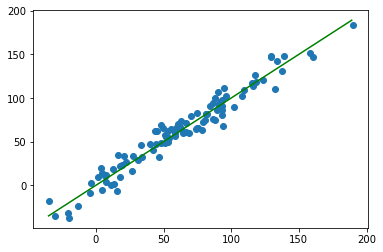

In [12]:
plt.scatter(myModel.test[myModel.target], testPred)
plt.xlabel = 'True test values'
plt.ylabel = 'Predicted test values'

#plot line y = x
x = np.arange(np.floor(myModel.test[myModel.target].min()), np.ceil(myModel.test[myModel.target].max()))
plt.plot(x,x,color = 'green')

plt.show()

If the points roughly follow the line y = x then that's an indication the model is working well enough